In [1]:
HEIGHT = 128
WIDTH = 128
EPOCHS = 8
BATCH_SIZE = 16
TRAIN_KITTI_CSV = "D:/kitti_dataset/train/kitti_train.csv"
TRAIN_CUSTOM_CSV = "D:/dataset/train/data_train.csv"

In [2]:
import numpy as np
import tensorflow as tf
from segmentation_models import Unet

%run utils/datasets.ipynb
%run utils/utils.ipynb

Segmentation Models: using `keras` framework.


In [ ]:
# KITTI dataset

In [3]:
partition_kitti, labels_kitti = load_train_csv(TRAIN_KITTI_CSV)

In [4]:
print(len(partition_kitti['train']), len(partition_kitti['validation']))

4539 1135


In [5]:
training_generator_kitti = DataGenerator(list_IDs=partition_kitti['train'], labels=labels_kitti, batch_size=BATCH_SIZE,
                                   dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)
validation_generator_kitti = DataGenerator(list_IDs=partition_kitti['validation'], labels=labels_kitti, batch_size=BATCH_SIZE,
                                     dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)

In [6]:
model_kitti = Unet("resnet34", input_shape=(HEIGHT,WIDTH,3), encoder_weights="imagenet", encoder_freeze=False)

In [7]:
model_kitti.compile(optimizer=opt,
              loss=lambda y_true, y_pred : gen_depth_loss(y_true, y_pred, (1.0, 3.0, 0.1)),
              metrics=[depth_acc])

In [8]:
resnet_kitti = model_kitti.fit(training_generator_kitti, validation_data=validation_generator_kitti, epochs=EPOCHS)

Epoch 1/8
283/283 [==============================] - 207s 698ms/step - loss: 0.3074 - depth_acc: 0.8544 - val_loss: 0.2162 - val_depth_acc: 0.8196
Epoch 2/8
283/283 [==============================] - 51s 181ms/step - loss: 0.1395 - depth_acc: 0.9446 - val_loss: 0.1846 - val_depth_acc: 0.8447
Epoch 3/8
283/283 [==============================] - 51s 178ms/step - loss: 0.1308 - depth_acc: 0.9528 - val_loss: 0.1336 - val_depth_acc: 0.9458
Epoch 4/8
283/283 [==============================] - 52s 183ms/step - loss: 0.1267 - depth_acc: 0.9571 - val_loss: 0.1353 - val_depth_acc: 0.9558
Epoch 5/8
283/283 [==============================] - 51s 179ms/step - loss: 0.1233 - depth_acc: 0.9604 - val_loss: 0.1357 - val_depth_acc: 0.9614
Epoch 6/8
283/283 [==============================] - 53s 186ms/step - loss: 0.1205 - depth_acc: 0.9635 - val_loss: 0.1282 - val_depth_acc: 0.9652
Epoch 7/8
283/283 [==============================] - 55s 193ms/step - loss: 0.1184 - depth_acc: 0.9650 - val_loss: 0.1227 -

In [9]:
print(resnet_kitti.history)

{'loss': [0.3073713183403015, 0.13951629400253296, 0.13081151247024536, 0.12672176957130432, 0.1233120709657669, 0.12045208364725113, 0.1183767169713974, 0.11726419627666473], 'depth_acc': [0.8543807864189148, 0.9445846080780029, 0.9527575969696045, 0.9570765495300293, 0.9603729844093323, 0.9634672403335571, 0.9649615287780762, 0.9660376310348511], 'val_loss': [0.21615390479564667, 0.18463319540023804, 0.13358445465564728, 0.13533154129981995, 0.13574644923210144, 0.12822237610816956, 0.12267281860113144, 0.1281306892633438], 'val_depth_acc': [0.8195536732673645, 0.8447363972663879, 0.9458051323890686, 0.9557647705078125, 0.9614008069038391, 0.9651671051979065, 0.9647977352142334, 0.966139018535614]}


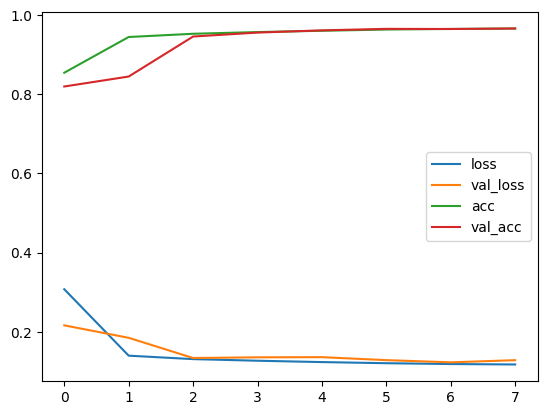

In [10]:
plot_history(resnet_kitti.history)

In [ ]:
# Custom dataset

In [11]:
partition_custom, labels_custom = load_train_csv(TRAIN_CUSTOM_CSV)

In [12]:
print(len(partition_custom['train']), len(partition_custom['validation']))

7532 1884


In [13]:
training_generator_custom = DataGenerator(list_IDs=partition_custom['train'], labels=labels_custom, batch_size=BATCH_SIZE,
                                   dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)
validation_generator_custom = DataGenerator(list_IDs=partition_custom['validation'], labels=labels_custom, batch_size=BATCH_SIZE,
                                     dim=(HEIGHT, WIDTH), n_channels=3, shuffle=True, pred=False)

In [14]:
model_custom = Unet("resnet34", input_shape=(HEIGHT,WIDTH,3), encoder_weights="imagenet", encoder_freeze=False)

In [15]:
model_custom.compile(optimizer=opt,
              loss=lambda y_true, y_pred : gen_depth_loss(y_true, y_pred, (1.0, 3.0, 0.1)),
              metrics=[depth_acc])

In [16]:
resnet_custom = model_custom.fit(training_generator_custom, validation_data=validation_generator_custom, epochs=EPOCHS)

Epoch 1/8
470/470 [==============================] - 419s 880ms/step - loss: 0.6832 - depth_acc: 0.8374 - val_loss: 0.6929 - val_depth_acc: 0.8427
Epoch 2/8
470/470 [==============================] - 85s 180ms/step - loss: 0.6211 - depth_acc: 0.8610 - val_loss: 0.6270 - val_depth_acc: 0.8624
Epoch 3/8
470/470 [==============================] - 85s 180ms/step - loss: 0.6121 - depth_acc: 0.8663 - val_loss: 0.6101 - val_depth_acc: 0.8688
Epoch 4/8
470/470 [==============================] - 90s 191ms/step - loss: 0.6060 - depth_acc: 0.8693 - val_loss: 0.6047 - val_depth_acc: 0.8724
Epoch 5/8
470/470 [==============================] - 88s 186ms/step - loss: 0.6015 - depth_acc: 0.8720 - val_loss: 0.6012 - val_depth_acc: 0.8725
Epoch 6/8
470/470 [==============================] - 87s 186ms/step - loss: 0.5969 - depth_acc: 0.8739 - val_loss: 0.5993 - val_depth_acc: 0.8729
Epoch 7/8
470/470 [==============================] - 89s 189ms/step - loss: 0.5939 - depth_acc: 0.8750 - val_loss: 0.5962 -

In [17]:
print(resnet_custom.history)

{'loss': [0.6832280158996582, 0.621127188205719, 0.6120578050613403, 0.6059994697570801, 0.6015233397483826, 0.5969202518463135, 0.5938739776611328, 0.5911729335784912], 'depth_acc': [0.8374280333518982, 0.8609964847564697, 0.8662778735160828, 0.8693209886550903, 0.8719556331634521, 0.8739058971405029, 0.8750172257423401, 0.877152144908905], 'val_loss': [0.6928540468215942, 0.6270326972007751, 0.6101229190826416, 0.6046935319900513, 0.6012201309204102, 0.5992887020111084, 0.5962149500846863, 0.5945575833320618], 'val_depth_acc': [0.8426778316497803, 0.8623940348625183, 0.8687712550163269, 0.8723797798156738, 0.8725314140319824, 0.8729248642921448, 0.8746581673622131, 0.8763846158981323]}


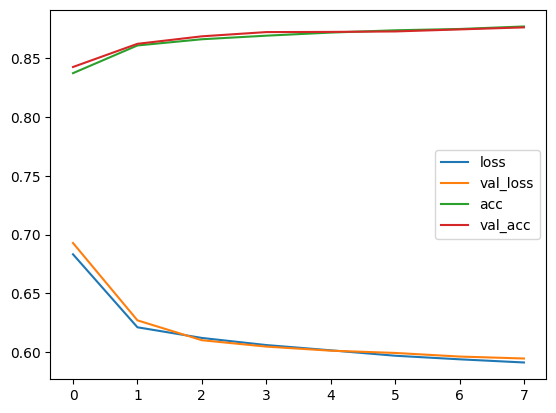

In [18]:
plot_history(resnet_custom.history)

In [19]:
def plot_combined_history(history1, history2):
    plt.figure(figsize=(12, 6))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['loss'], label='KITTI Dataset Train Loss')
    plt.plot(history1.history['val_loss'], label='KITTI Dataset Val Loss')
    plt.plot(history2.history['loss'], label='Custom Dataset Train Loss')
    plt.plot(history2.history['val_loss'], label='Custom Dataset Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['depth_acc'], label='KITTI Dataset Train Accuracy')
    plt.plot(history1.history['val_depth_acc'], label='KITTI Dataset Val Accuracy')
    plt.plot(history2.history['depth_acc'], label='Custom Dataset Train Accuracy')
    plt.plot(history2.history['val_depth_acc'], label='Custom Dataset Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

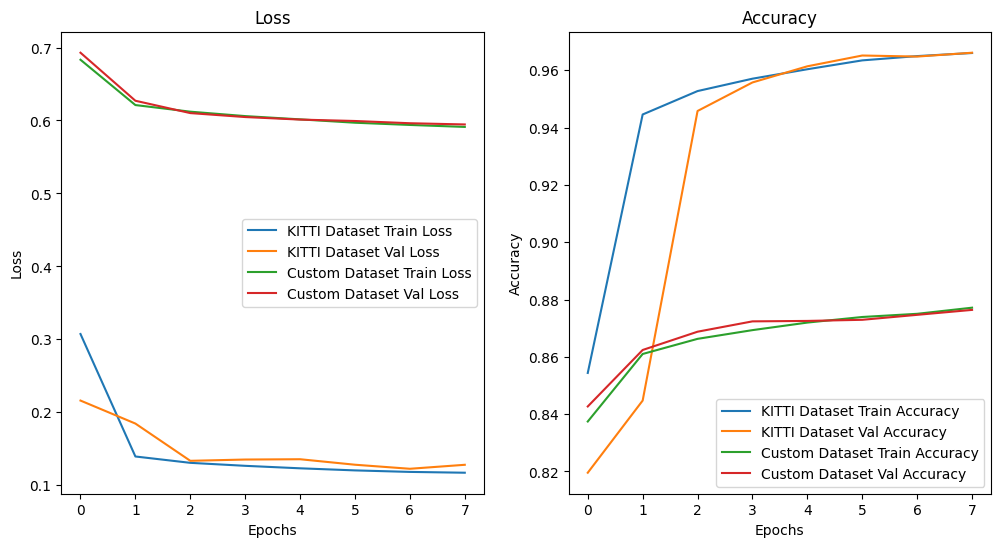

In [20]:
plot_combined_history(resnet_kitti, resnet_custom)